## Trajectory Prediction by Interpolation

In [472]:
import pandas as pd

red_ball_fill = pd.read_csv('../test-data/red_ball_coordinates_128px_2024-02-27_13h38m.csv', delimiter=',', decimal='.')
red_ball_fill

,u0,v0,u1,v1,u2,v2,u3,v3,u4,v4,u5,v5,u6,v6
0,36.0,40.0,125.0,41.0,33.5,84.0,78.0,83.0,126.0,85.0,NaN,NaN,69.0,121.0
1,36.0,41.0,124.5,42.0,33.0,85.0,77.5,84.0,126.0,87.0,NaN,NaN,69.0,120.5
2,36.0,42.0,124.0,44.0,33.0,86.0,77.5,85.0,126.0,88.0,NaN,NaN,69.0,120.5
3,36.0,43.5,124.0,45.0,33.0,87.0,77.0,86.0,125.5,89.0,NaN,NaN,69.0,120.0
4,36.0,45.0,123.0,46.0,33.0,89.0,77.0,87.0,126.0,91.0,NaN,NaN,69.0,120.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1469,88.0,6.0,56.0,24.0,83.5,54.0,12.0,72.0,60.5,70.0,74.0,98.0,68.5,118.5
1470,88.5,6.0,56.5,24.0,83.5,54.0,11.5,71.0,60.5,70.0,74.0,98.0,68.5,118.5
1471,88.0,7.0,56.5,24.0,83.5,54.0,11.0,71.5,60.5,70.0,74.0,98.0,68.5,118.5
1472,88.0,7.0,56.5,24.0,83.5,54.5,11.0,71.5,60.5,70.0,74.0,98.0,68.5,118.5


In [473]:
#### Split the test data into NaN and non-NaN rows
X = red_ball_fill.copy()
X

,u0,v0,u1,v1,u2,v2,u3,v3,u4,v4,u5,v5,u6,v6
0,36.0,40.0,125.0,41.0,33.5,84.0,78.0,83.0,126.0,85.0,NaN,NaN,69.0,121.0
1,36.0,41.0,124.5,42.0,33.0,85.0,77.5,84.0,126.0,87.0,NaN,NaN,69.0,120.5
2,36.0,42.0,124.0,44.0,33.0,86.0,77.5,85.0,126.0,88.0,NaN,NaN,69.0,120.5
3,36.0,43.5,124.0,45.0,33.0,87.0,77.0,86.0,125.5,89.0,NaN,NaN,69.0,120.0
4,36.0,45.0,123.0,46.0,33.0,89.0,77.0,87.0,126.0,91.0,NaN,NaN,69.0,120.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1469,88.0,6.0,56.0,24.0,83.5,54.0,12.0,72.0,60.5,70.0,74.0,98.0,68.5,118.5
1470,88.5,6.0,56.5,24.0,83.5,54.0,11.5,71.0,60.5,70.0,74.0,98.0,68.5,118.5
1471,88.0,7.0,56.5,24.0,83.5,54.0,11.0,71.5,60.5,70.0,74.0,98.0,68.5,118.5
1472,88.0,7.0,56.5,24.0,83.5,54.5,11.0,71.5,60.5,70.0,74.0,98.0,68.5,118.5


In [474]:
X_0 = X[['u5', 'v5']]
# Create a copy to keep non-NaN rows
X_0_copy = X_0.copy()

X_0_nan = X_0_copy[X_0_copy.isna().any(axis=1)]

In [475]:
# Drop NaN rows for z-score calculation
X_0_non_nan = X_0.dropna()

In [476]:
from sklearn.ensemble import IsolationForest
import numpy as np

model= IsolationForest(contamination=0.2)
model.fit(X_0_non_nan)
outliers_mask = model.predict(X_0_non_nan) == -1

In [477]:
for index in X_0_copy.index:
    if index in X_0_non_nan.index[outliers_mask]:
        # the corresponding row in X_0_copy should be dropped
        X_0_copy = X_0_copy.drop(index)

In [478]:
X_0_copy

,u5,v5
0,NaN,NaN
1,NaN,NaN
2,NaN,NaN
3,NaN,NaN
4,NaN,NaN
...,...,...
1469,74.0,98.0
1470,74.0,98.0
1471,74.0,98.0
1472,74.0,98.0


In [479]:
X_0_copy.interpolate(method='polynomial', inplace=True, order=2)

In [480]:
X_0_nan = X_0_nan.fillna(X_0_copy)
X_0_nan

,u5,v5
0,NaN,NaN
1,NaN,NaN
2,NaN,NaN
3,NaN,NaN
4,NaN,NaN
...,...,...
1408,73.976887,133.107551
1409,73.982755,132.334117
1410,73.987767,131.527659
1411,73.991924,130.688176


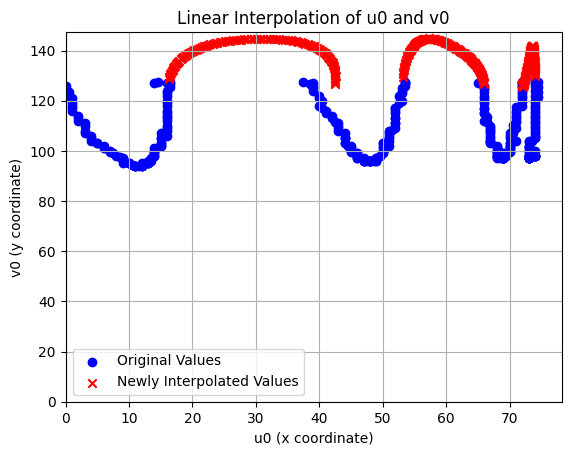

In [481]:
from matplotlib import pyplot as plt

# Plotting
plt.scatter(X_0['u5'], X_0['v5'], c='blue', marker='o', label='Original Values')
plt.scatter(X_0_nan.u5, X_0_nan.v5, c='red', marker='x', label='Newly Interpolated Values')
plt.title('Linear Interpolation of u0 and v0')
plt.xlabel('u0 (x coordinate)')
plt.ylabel('v0 (y coordinate)')
plt.legend()

plt.xlim(0)
plt.ylim(0)
plt.grid(True)
plt.show()